# Analysis of Wind Data in Ireland

This notebook looks at weather data related to wind in Ireland.
The data was taken from Met Éireann and is used here to explore how wind speed changes over time and what that might mean for wind energy.

## About the Data

Before analysing the data, it is useful to understand where it comes from and what information it contains.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
skip_rows = 23

wind_simple = pd.read_csv("data/Wind_Speed_hourly.csv", skiprows=skip_rows)

wind_simple.columns

/tmp/ipykernel_1792/1146454409.py:3: DtypeWarning: Columns (8,9,14,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  wind_simple = pd.read_csv("data/Wind_Speed_hourly.csv", skiprows=skip_rows)


Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')

In [3]:
# Rename only relevant columns
wind_simple.rename(columns={'date': 'Time', 'wdsp': 'Wind'}, inplace=True)


# Convert Time object to datetime.
wind_simple['Time'] = pd.to_datetime(wind_simple['Time'], format='%d-%b-%Y %H:%M')

wind_simple = wind_simple[['Time', 'Wind']]

print(wind_simple.head())
print(wind_simple.info())

                 Time  Wind
0 1945-01-01 00:00:00     0
1 1945-01-01 01:00:00     0
2 1945-01-01 02:00:00     0
3 1945-01-01 03:00:00     0
4 1945-01-01 04:00:00     7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709297 entries, 0 to 709296
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Time    709297 non-null  datetime64[ns]
 1   Wind    709297 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.8 MB
None


In [4]:
wind_simple.rename(columns={'date': 'Time', 'wdsp': 'Wind'}, inplace=True)

wind_simple = wind_simple[['Time', 'Wind']]

In [5]:
wind_simple['Time'] = pd.to_datetime(wind_simple['Time'], format='%d-%b-%Y %H:%M')

## Preparing the Dataset

The dataset contains some missing and inconsistent values which need to be fixed before doing any analysis.

In [12]:
# Extract Year and Month from Time column.
wind_simple['Year'] = wind_simple['Time'].dt.year
wind_simple['Month'] = wind_simple['Time'].dt.month
wind_simple['Quarter'] = wind_simple['Time'].dt.quarter

In [13]:
# Calculate yearly and monthly averages.
yearly_avg = wind_simple.groupby('Year')['Wind'].mean()
monthly_avg = wind_simple.groupby('Month')['Wind'].mean()
quarterly_avg = wind_simple.groupby('Quarter')['Wind'].mean()

In [8]:
# Apply a 5-year rolling average to yearly averages.
yearly_rolling = yearly_avg.rolling(window=5, center=True).mean()

## Exploring Wind Speed

In this section, different summaries and plots are used to explore wind speed patterns over time.

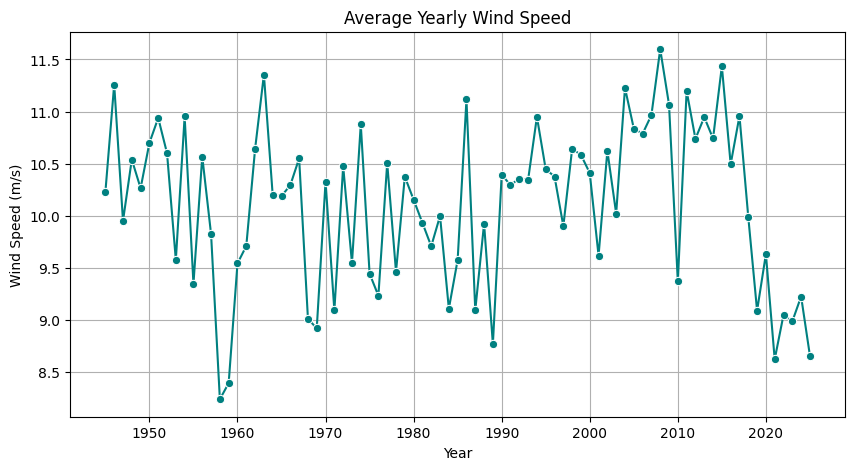

In [9]:
# Plot yearly averages.

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values, marker='o', color='teal')
plt.title("Average Yearly Wind Speed")
plt.xlabel("Year")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.show()

/tmp/ipykernel_1792/2355200451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")


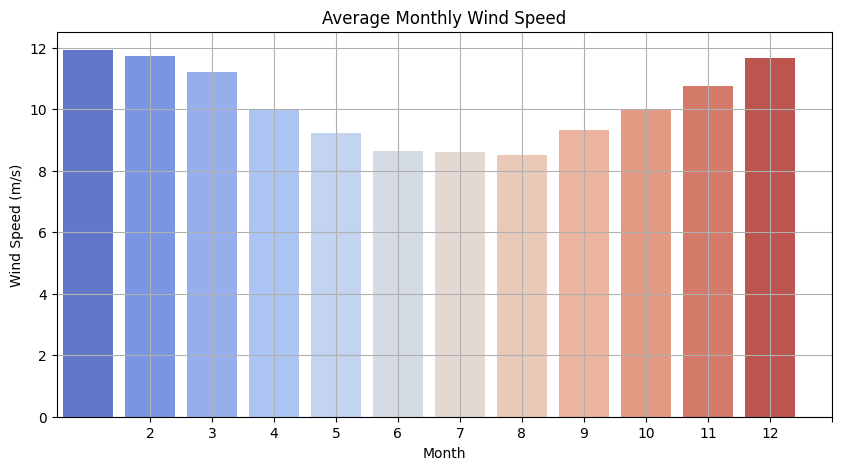

In [10]:
# Plot monthly averages.

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")
plt.title("Average Monthly Wind Speed")
plt.xlabel("Month")
plt.ylabel("Wind Speed (m/s)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

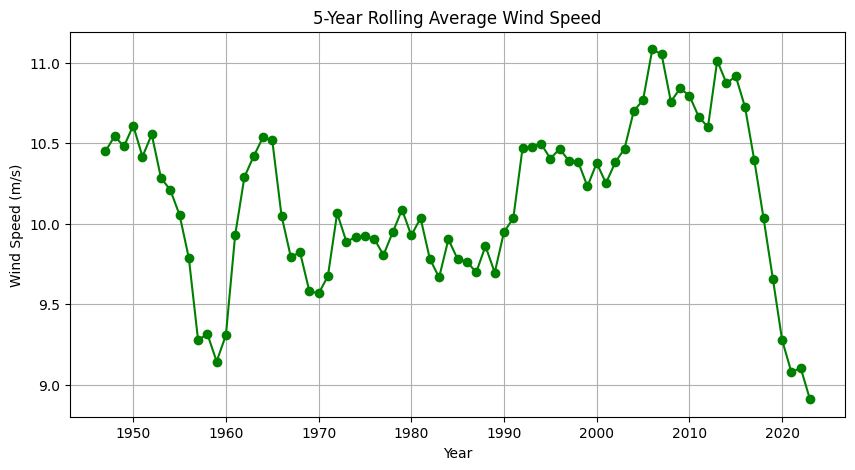

In [ ]:
# Plot 5-year rolling average.
plt.figure(figsize=(10, 5))
plt.plot(yearly_rolling.index, yearly_rolling.values, marker='o', color='green')
plt.title("5-Year Rolling Average Wind Speed")
plt.xlabel("Year")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.show()

In [ ]:
# Plot quarterly averages.

plt.figure(figsize=(8, 5))
sns.barplot(x=quarterly_avg.index, y=quarterly_avg.values, palette="viridis")
plt.title("Average Wind Speed per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Wind Speed (m/s)")
plt.show()


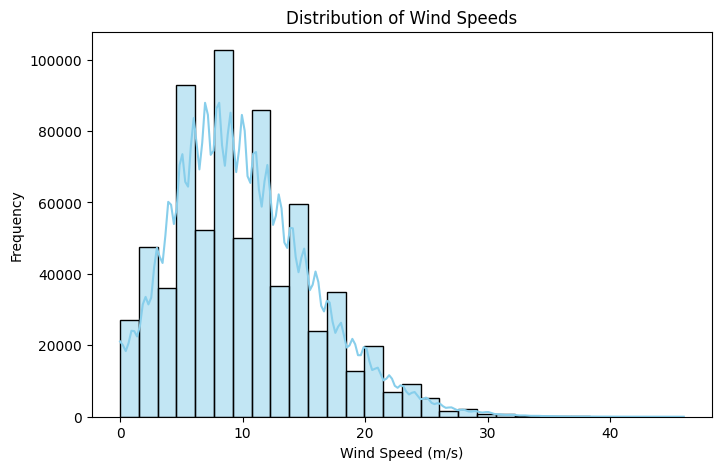

In [14]:

# Plot distribution of wind speeds.

plt.figure(figsize=(8, 5))
sns.histplot(wind_simple['Wind'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Wind Speeds")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()


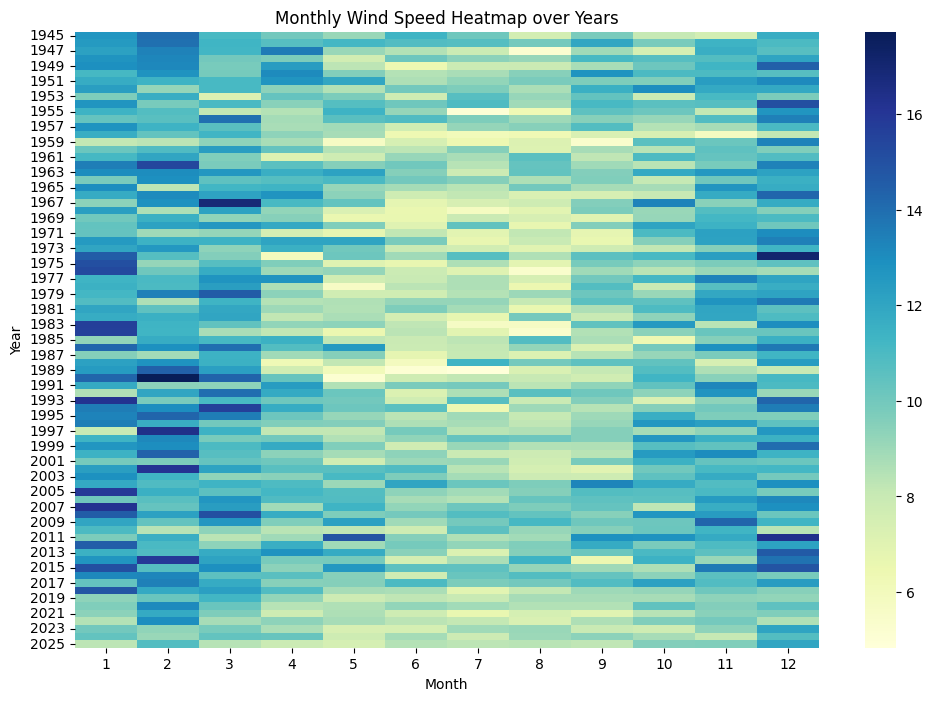

In [15]:
# Plot heatmap of monthly wind speeds over years.

pivot_table = wind_simple.pivot_table(values='Wind', index='Year', columns='Month', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.title("Monthly Wind Speed Heatmap over Years")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


## Discussion of Results

This section discusses what was observed from the analysis and how it may relate to wind energy.